In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5406-E810

 Directory of C:\Users\Admin\assignment\assocition

21-09-2021  17:43    <DIR>          .
21-09-2021  17:43    <DIR>          ..
21-09-2021  15:28    <DIR>          .ipynb_checkpoints
15-09-2021  19:18            46,094 book.csv
15-09-2021  19:18               767 my_movies.csv
15-09-2021  19:18               274 Problem_Statment.txt
21-09-2021  15:53         1,013,803 report.html
21-09-2021  17:43           173,708 Untitled.ipynb
21-09-2021  15:52           662,380 weather_report.html
               6 File(s)      1,897,026 bytes
               3 Dir(s)  35,961,532,416 bytes free


In [3]:
data=pd.read_csv("book.csv")

In [4]:
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
data.shape

(2000, 11)

In [6]:
data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [8]:
from mlxtend.frequent_patterns import apriori,association_rules

In [14]:
frequent_itemsets = apriori(data,min_support=0.010,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
11097,(ChildBks),"(ArtBks, ItalAtlas, ItalCook, CookBks, ItalArt...",0.4230,0.0125,0.011,0.026005,2.080378,0.005712,1.013865
11098,(ItalCook),"(ArtBks, ItalAtlas, ChildBks, CookBks, ItalArt...",0.1135,0.0115,0.011,0.096916,8.427504,0.009695,1.094583
11099,(CookBks),"(ArtBks, ItalAtlas, ChildBks, ItalCook, ItalAr...",0.4310,0.0110,0.011,0.025522,2.320186,0.006259,1.014902
11100,(ItalArt),"(ArtBks, ItalAtlas, ChildBks, ItalCook, CookBk...",0.0485,0.0115,0.011,0.226804,19.722098,0.010442,1.278460


In [15]:
rules[(rules['lift']>= 1.1) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
11072,"(ItalArt, ItalCook, RefBks)","(CookBks, ArtBks, ItalAtlas, ChildBks)",0.0160,0.0125,0.0110,0.687500,55.000000,0.010800,3.160000
11073,"(ItalArt, CookBks, RefBks)","(ItalCook, ArtBks, ItalAtlas, ChildBks)",0.0165,0.0115,0.0110,0.666667,57.971014,0.010810,2.965500
11074,"(ArtBks, ItalAtlas)","(ChildBks, ItalCook, CookBks, ItalArt, RefBks)",0.0180,0.0145,0.0110,0.611111,42.145594,0.010739,2.534143
11083,"(ItalArt, ItalAtlas)","(ArtBks, ChildBks, ItalCook, CookBks, RefBks)",0.0165,0.0220,0.0110,0.666667,30.303030,0.010637,2.934000


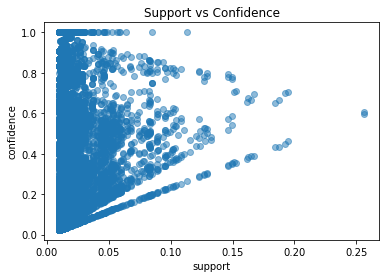

In [16]:
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

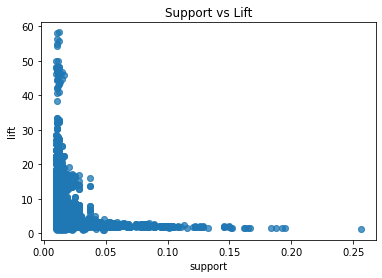

In [17]:
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

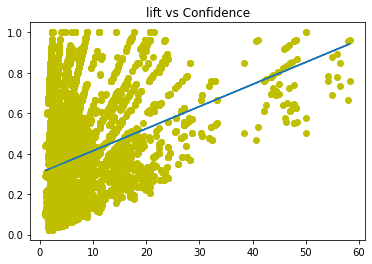

In [18]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.title('lift vs Confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))